# Keras

[Keras](https://keras.io) est une librairie Python très polulaire dédiée à l'apprentissage profond. Elle peut fonctionner comme surcouche de plusieurs librairies, comme [Tensorflow](https://www.tensorflow.org) ou [Theano](https://github.com/Theano/Theano). Keras est maintenant inclue dans [Tensorflow 2.0](https://www.tensorflow.org/api_docs/python/tf/keras)

Keras a été développée pour travailler avec des modèles à réseaux de neurones profonds, en faisant en sorte d'être simple à utiliser et intuitive. Keras inclue un certain nombre de couches, de fonctions d'activations et d'optimiseurs communément utilisés. Un modèle peut être défini et entrainé avec seulement quelques lignes de code en Python.

Keras fonctionne avec Matplotlib and NumPy.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json

from matplotlib import pyplot as plt

import numpy as np

# Apprentissage d'une fonction mathématique

Nous allons prendre un exemple simple : développer un modèle Keras pour prédire les valeurs en sortie d'une fonction mathématique. Cet exemple s'entraine rapidement, ce qui est idéal pour faire des expériences.

Les échantillons pour les tests et pour les données sont générés avec la fonction ci-dessous. Le nombre d'échantillons pour les tests peut être ajusté afin d'explorer la précision du modèle en fonction de la taille des données.

In [2]:
def function(x):
    return 10*x**2 - 5*x - 0.5

In [3]:
# Génération des données d'entrainement
x_entrainement = np.random.rand(10000)
y_entrainement = function(x_entrainement)

# Génération des données pour les tests
x_test = np.linspace(0, 1, 100)
y_test = function(x_test)

# Visualisation des données

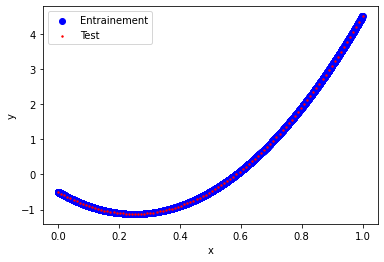

In [4]:
plt.scatter(x_entrainement, y_entrainement, label='Entrainement', color='blue')
plt.scatter(x_test, y_test, label='Test', color='red',s=2)
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

# Definition du modèle

Nous allons utiliser un [modèle séquentiel](https://keras.io/guides/sequential_model/) multi-couches avec une fonction d'activation de type [Unité Linéaire Rectifiée (Rectified Linear Unit - ReLU)](https://fr.wikipedia.org/wiki/Redresseur_(r%C3%A9seaux_neuronaux)). La couche de sortie n'a pas de fonction d'activation afin de produire des données continues en sortie.  
*  Le terme dense signifie qu'une fonction d'activation non linéaire est utlisée en sortie des couches internes.  
*  Le modèle séquentiel est adapté dans le cas où chaque couche possède une entrée et une sortie et où les couches s'échangent des données. Il n'est pas adapté pour les modèles multi-entrées / sorties ou dans le cas où il n'y a pas d'échange de données entre les couches.  


La structure du modèle est la suivante :  
*  L'entrée du modèle est de dimension 1. La couche d'entrée contient donc 1 neurone.  
*  La première couche cachée contient 200 neurones (units).    
*  La deuxième couche cachée contient 20 neurones.  
*  La couche de sortie contient un seul neurone.  
*  La couche d'entrée et la première couche cachée ont une fonction d'activation non linéaire de type ReLU en sortie.  

Sous forme graphique, sa structure est la suivante :  
  

![ReseauNeurone](Images/NeuronneKeras.png "ReseauNeurone")

In [5]:
model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=20))
model.add(Activation('relu'))
model.add(Dense(units=1))

On peut obtenir une description du modèle créé avec la fonction **summary** :

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               400       
_________________________________________________________________
activation (Activation)      (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                4020      
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 4,441
Trainable params: 4,441
Non-trainable params: 0
_________________________________________________________________


# Entrainement

In [ ]:
model.compile(loss='mean_squared_error', optimizer=Adam())
history = model.fit(x_entrainement, y_entrainement, batch_size=50, epochs=10, verbose=1, validation_data=(x_test, y_test))

# Les pertes du modèle (fonction d'objectif - Loss Function)

Les pertes sont la différence entre les valeurs attendues (y_entrainement) et les sorties du modèle. Plus les pertes sont faibles, plus le modèle est juste.

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pertes du modèle')
plt.ylabel('Pertes')
plt.xlabel('Itération')
plt.legend(['Entrainement', 'Test'], loc='upper right')
plt.show()

# Predictions

In [ ]:
y_predictions = model.predict(x_test)

In [ ]:
plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

# Save the Model

The model structure and trained weights/biases can be saved to files. These can be reloaded later for prediction.

In [ ]:
model_structure = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights.h5")

# Restore Trained Model

In [ ]:
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
restored_model = model_from_json(loaded_model_json)
restored_model.load_weights("weights.h5")

# Predictions

Make predictions using the restored model. It should produce the same results as the original model.

In [ ]:
y_predictions = restored_model.predict(x_test, batch_size=1)

plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()